<a href="https://colab.research.google.com/github/nehabindle/Yelp-Review-Classification/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s gdrive/'Team Drives'/'Data Mining Team'/ gdata

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [0]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('gdata/yelpHotelData.db')
x1 = connection.execute("select * FROM review")

In [0]:
description = []
Class = []

data = x1.fetchmany(688329)

for x in data:
  description.append(x[3])
  Class.append(x[8])
trainData = {'Class' : Class, 'Description' : description}
df_X = pd.DataFrame(trainData)

In [8]:
#Convert NR->N , YR->Y
df_X.loc[df_X['Class'] == "NR", 'Class'] = "N"
df_X.loc[df_X['Class'] == "YR", 'Class'] = "Y"
df_X['Class'].value_counts()

N    420785
Y    267544
Name: Class, dtype: int64

In [0]:
df_X['Class'] = df_X['Class'].apply(lambda x:1 if x=='Y' else 0)

In [0]:
texts = df_X['Description'].values
labels = df_X['Class'].values

In [11]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [12]:
MAX_NUM_WORDS=1000
MAX_SEQUENCE_LENGTH=100
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 322447 unique tokens.
Shape of data tensor: (688329, 100)
Shape of label tensor: (688329,)


In [0]:
labels=np.asarray(labels)

In [0]:
VALIDATION_SPLIT=0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

# x_train = data[:-nb_validation_samples]
# y_train = labels[:-nb_validation_samples]
# x_val = data[-nb_validation_samples:]
# y_val = labels[-nb_validation_samples:]

In [0]:
# #Preparing the Embedding layer

# GLOVE_DIR='../input/glove-global-vectors-for-word-representation/'

# import os
# embeddings_index = {}
# f = open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'))
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [16]:
training_samples =  550663 #  train on 75000 samples
test_samples = 137706
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples: training_samples + test_samples]
y_test = labels[training_samples: training_samples + test_samples]
print(" x_train",x_train.shape)
print(" y_train",y_train.shape)

 x_train (550663, 100)
 y_train (550663,)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop

In [18]:
max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 64,input_length = maxlen))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [19]:
%%time
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 895s 2ms/step - loss: 0.6249 - acc: 0.6439 - val_loss: 0.6097 - val_acc: 0.6583
Epoch 2/5
440530/440530 [==============================] - 898s 2ms/step - loss: 0.6125 - acc: 0.6560 - val_loss: 0.6067 - val_acc: 0.6601
Epoch 3/5
440530/440530 [==============================] - 897s 2ms/step - loss: 0.6074 - acc: 0.6607 - val_loss: 0.6034 - val_acc: 0.6639
Epoch 4/5
440530/440530 [==============================] - 896s 2ms/step - loss: 0.6042 - acc: 0.6638 - val_loss: 0.6014 - val_acc: 0.6662
Epoch 5/5
440530/440530 [==============================] - 904s 2ms/step - loss: 0.6019 - acc: 0.6661 - val_loss: 0.6017 - val_acc: 0.6669
CPU times: user 2h 8min 42s, sys: 11min 31s, total: 2h 20min 13s
Wall time: 1h 14min 52s


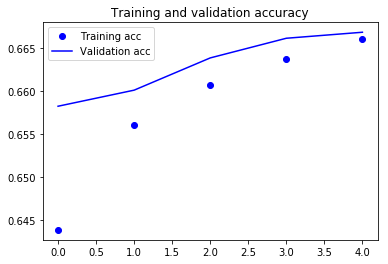

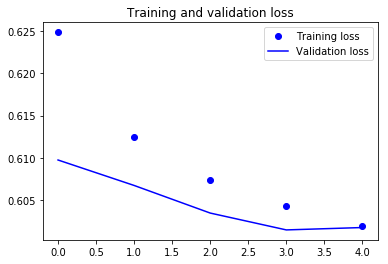

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model.evaluate(x_test, y_test)


137666/137666 [==============================] - 72s 525us/step


[0.6039201718416312, 0.6643978905466854]

In [22]:
model.metrics_names

['loss', 'acc']

In [0]:
#Model 2 - Using combination of CNN and RNN

In [24]:
model_conv = Sequential()
model_conv.add(Embedding(max_words, 128, input_length=maxlen))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=3))
model_conv.add(LSTM(128))
model_conv.add(Dense(1, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,419,969
Trainable params: 1,419,969
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model_conv.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 897s 2ms/step - loss: 0.6140 - acc: 0.6536 - val_loss: 0.6029 - val_acc: 0.6634
Epoch 2/5
440530/440530 [==============================] - 901s 2ms/step - loss: 0.6031 - acc: 0.6638 - val_loss: 0.6019 - val_acc: 0.6675
Epoch 3/5
440530/440530 [==============================] - 903s 2ms/step - loss: 0.5966 - acc: 0.6705 - val_loss: 0.5988 - val_acc: 0.6682
Epoch 4/5
440530/440530 [==============================] - 904s 2ms/step - loss: 0.5899 - acc: 0.6759 - val_loss: 0.6047 - val_acc: 0.6589
Epoch 5/5
440530/440530 [==============================] - 908s 2ms/step - loss: 0.5829 - acc: 0.6839 - val_loss: 0.6007 - val_acc: 0.6681


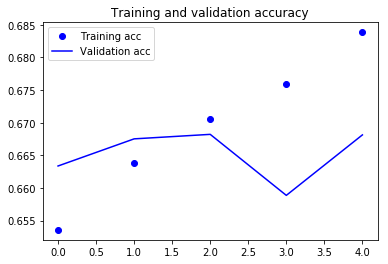

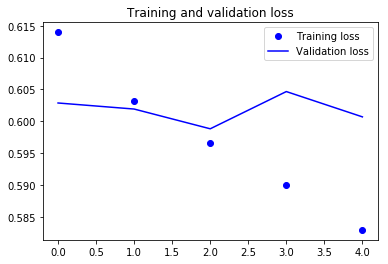

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
model_conv.evaluate(x_test, y_test)


137666/137666 [==============================] - 95s 687us/step


[0.6033425485095615, 0.6644705301236326]

In [0]:
#Using bidirectional RNN's
from keras import backend as K
K.clear_session()

In [29]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,543,425
Trainable params: 1,543,425
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 3393s 8ms/step - loss: 0.6200 - acc: 0.6480 - val_loss: 0.6109 - val_acc: 0.6538
Epoch 2/5
440530/440530 [==============================] - 3363s 8ms/step - loss: 0.6089 - acc: 0.6588 - val_loss: 0.6045 - val_acc: 0.6628
Epoch 3/5
440448/440530 [============================>.] - ETA: 0s - loss: 0.6035 - acc: 0.6646

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:

model.evaluate(x_test, y_test)